In [26]:
function euler_method(f, y0, x0, x_end, h)
    x_values = x0:h:x_end
    y_values = zeros(length(x_values))
    y_values[1] = y0
    for i in 1:(length(x_values) - 1)
        y_values[i + 1] = y_values[i] + h * f(x_values[i], y_values[i])
    end
    return x_values, y_values
end

euler_method (generic function with 1 method)

In [27]:
function heun_method(f, y0, x0, x_end, h)
    x_values = x0:h:x_end
    y_values = zeros(length(x_values))
    y_values[1] = y0
    for i in 1:(length(x_values) - 1)
        y_pred = y_values[i] + h * f(x_values[i], y_values[i])
        y_values[i + 1] = y_values[i] + (h / 2) * (f(x_values[i], y_values[i]) + f(x_values[i + 1], y_pred))
    end
    return x_values, y_values
end

heun_method (generic function with 1 method)

In [28]:
function midpoint_method(f, y0, x0, x_end, h)
    x_values = x0:h:x_end
    y_values = zeros(length(x_values))
    y_values[1] = y0

    for i in 1:(length(x_values) - 1)
        y_mid = y_values + (h/2) * f(x_values[i], y_values[i])
        y_values[i + 1] = y_values[i] + h * f(x_values[i] + h / 2, y_mid)
    end
    return x_values, y_values
end

midpoint_method (generic function with 1 method)

In [29]:
function rk4_method(f, y0, x0, x_end, h)
    x_values = x0:h:x_end
    y_values = zeros(length(x_values))
    y_values[1] = y0
    for i in 1:(length(x_values)-1)
        k1 = h * f(x_values[i], y_values[i])
        k2 = h * f(x_values[i] + h/2, y_values[i] + k1/2)
        k3 = h * f(x_values[i] + h/2, y_values[i] + k2/2)
        k4 = h * f(x_values[i] + h, y_values[i] + k3)
        y_values[i+1] = y_values[i] + (k1 + 2k2 + 2k3 + k4) / 6
    end
    return x_values, y_values
end

rk4_method (generic function with 1 method)

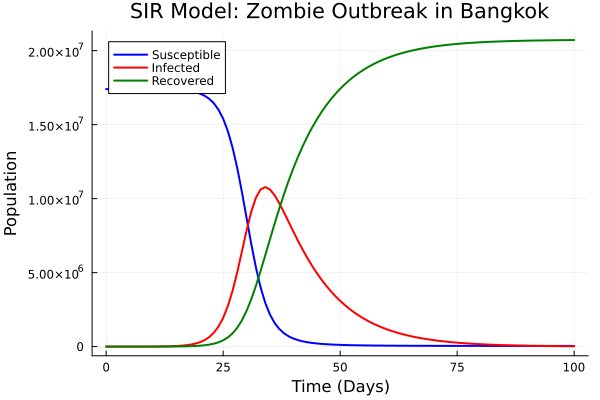

In [30]:
using Plots
function dSdt(S, I, β, N)
    return -β * S * I / N
end

function dIdt(S, I, β, γ, N)
    return β * S * I / N - γ * I
end

function dRdt(I, γ)
    return γ * I
end

β = 0.5
γ = 0.1
N = 17.4e6
S0 = N - 100
I0 = 100
R0 = 0
t0 = 0
t_end = 100
h = 1

t_values = t0:h:t_end
S_values = zeros(length(t_values))
I_values = zeros(length(t_values))
R_values = zeros(length(t_values))

S_values[1] = S0
I_values[1] = I0
R_values[1] = R0

for i in 1:(length(t_values) - 1)
    f_S(t, S) = dSdt(S, I_values[i], β, N)
    t_values_S, S_temp = rk4_method(f_S, S_values[i], t_values[i], t_values[i+1], h)
    S_values[i+1] = S_temp[end]

    f_I(t, I) = dIdt(S_values[i], I, β, γ, N)
    t_values_I, I_temp = rk4_method(f_I, I_values[i], t_values[i], t_values[i+1], h)
    I_values[i+1] = I_temp[end]

    f_R(t, R) = dRdt(I_values[i], γ)
    t_values_R, R_temp = rk4_method(f_R, R_values[i], t_values[i], t_values[i+1], h)
    R_values[i+1] = R_temp[end]
end

plot(t_values, S_values, label="Susceptible", linewidth=2, color=:blue)
plot!(t_values, I_values, label="Infected", linewidth=2, color=:red)
plot!(t_values, R_values, label="Recovered", linewidth=2, color=:green)
xlabel!("Time (Days)")
ylabel!("Population")
title!("SIR Model: Zombie Outbreak in Bangkok")